<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/IncumplimientoTarjetasCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REDES NEURONALES ARTIFICIALES


##Carga de datos
---

Mostrando lista de archivos:

In [0]:
%%bash
if [ ! -f "clientes_data.csv" ]; then
    wget www.fragote.com/data/clientes_data.csv
fi

ls -l 

total 676
-rw-r--r-- 1 root root 684866 Sep 28 21:10 clientes_data.csv
drwxr-xr-x 1 root root   4096 Nov  6 16:17 sample_data


--2019-11-09 17:54:48--  http://www.fragote.com/data/clientes_data.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fragote.com/data/clientes_data.csv [following]
--2019-11-09 17:54:49--  https://www.fragote.com/data/clientes_data.csv
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684866 (669K) [text/csv]
Saving to: ‘clientes_data.csv’

     0K .......... .......... .......... .......... ..........  7%  920K 1s
    50K .......... .......... .......... .......... .......... 14% 1.93M 0s
   100K .......... .......... .......... .......... .......... 22% 11.5M 0s
   150K .......... .......... .......... .......... .......... 29% 2.30M 0s
   200K .......... .......... .......... .......... .......... 37% 11.3M 0s
   250

##Funciones necesarias
---

In [0]:
# Funciones

import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.externals import joblib

import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None):
    """
    Esta función imprime y traza la matriz de confusión.
     La normalización se puede aplicar configurando `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de Confusión Normalizada'
        else:
            title = 'Matriz de Confusión sin Normalizar'

    # Calculando la Matriz de Confusion
    cm = confusion_matrix(y_true, y_pred)
    # solo usar las etiquetas que se tienen en la data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(linewidth=.0)
    # Queremos mostrar todos los puntos...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... etiquetando la lista de datos
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # rotando las etiquedas de los puntos.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()
    return ax

def saveFile(object_to_save, scaler_filename):
    joblib.dump(object_to_save, scaler_filename)

def loadFile(scaler_filename):
    return joblib.load(scaler_filename)

def plotHistogram(dataset_final):
    dataset_final.hist(figsize=(20,14), edgecolor="black", bins=40)
    plt.show()

def plotCorrelations(dataset_final):
    fig, ax = plt.subplots(figsize=(10,8))   # size in inches
    g = sns.heatmap(dataset_final.corr(), annot=True, cmap="YlGnBu", ax=ax)
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    fig.tight_layout()
    plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)



 ## PARTE I - PREPROCESAMIENTO DE DATOS
---


In [0]:
# Importando librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importando Datasets
dataset_csv = pd.read_csv('clientes_data.csv')

# Columnas de la data
print ("\nColumnas del DataSet: ")
print (dataset_csv.columns)

# Describir la data original
print ("\nDataset original:\n", dataset_csv.describe(include='all'))

# Dataset reducido
dataset = dataset_csv.iloc[:,3:14]
dataset_columns = dataset.columns
dataset_values = dataset.values

# Describir la data truncada
print ("\nDataset reducido: ")
print("\n",dataset.head())

# Revisamos los tipos de datos de las Columnas
print ("\nTipos de Columnas del Dataset: ")
print(dataset.dtypes)


Columnas del DataSet: 
Index(['NumeroFila', 'DNI', 'Apellido', 'ScoreCrediticio', 'Pais', 'Genero',
       'edad', 'Tenure', 'Balance', 'NumDeProducts', 'TieneTarjetaCredito',
       'EsMiembroActivo', 'SalarioEstimado', 'Abandono'],
      dtype='object')

Dataset original:
          NumeroFila           DNI  ... SalarioEstimado      Abandono
count   10000.00000  1.000000e+04  ...    10000.000000  10000.000000
unique          NaN           NaN  ...             NaN           NaN
top             NaN           NaN  ...             NaN           NaN
freq            NaN           NaN  ...             NaN           NaN
mean     5000.50000  1.569094e+07  ...   100090.239881      0.203700
std      2886.89568  7.193619e+04  ...    57510.492818      0.402769
min         1.00000  1.556570e+07  ...       11.580000      0.000000
25%      2500.75000  1.562853e+07  ...    51002.110000      0.000000
50%      5000.50000  1.569074e+07  ...   100193.915000      0.000000
75%      7500.25000  1.575323e+07

# Codificando datos categóricos: **Pais** y **Genero** deben ser convertidos a datos numericos


In [0]:
#Codificando datos categóricos:
labelEncoder_X_1 = LabelEncoder()
dataset_values[:, 1] = labelEncoder_X_1.fit_transform(dataset_values[:, 1])
labelEncoder_X_2 = LabelEncoder()
dataset_values[:, 2] = labelEncoder_X_2.fit_transform(dataset_values[:, 2])
print ("\nDataset Categorizado: \n", dataset_values)


Dataset Categorizado: 
 [[619 0 0 ... 1 101348.88 1]
 [608 2 0 ... 1 112542.58 0]
 [502 0 0 ... 0 113931.57 1]
 ...
 [709 0 0 ... 1 42085.58 1]
 [772 1 1 ... 0 92888.52 1]
 [792 0 0 ... 0 38190.78 0]]


Escalamiento/Normalización de Features (StandardScaler: (x-u)/s): mean = 0 and standard deviation = 1

In [0]:
# Escalamiento/Normalización de Features (StandardScaler: (x-u)/s)
stdScaler = StandardScaler()
dataset_values[:,0:10] = stdScaler.fit_transform(dataset_values[:,0:10])


# Dataset final normalizado
dataset_final = pd.DataFrame(dataset_values,columns=dataset_columns, dtype=np.float64)
print ("\nDataset Final:")
print(dataset_final.describe(include='all'))
print("\n", dataset_final.head())


Dataset Final:
       ScoreCrediticio          Pais  ...  SalarioEstimado      Abandono
count     1.000000e+04  1.000000e+04  ...     1.000000e+04  10000.000000
mean     -4.870326e-16  5.266676e-16  ...    -1.580958e-17      0.203700
std       1.000050e+00  1.000050e+00  ...     1.000050e+00      0.402769
min      -3.109504e+00 -9.018862e-01  ...    -1.740268e+00      0.000000
25%      -6.883586e-01 -9.018862e-01  ...    -8.535935e-01      0.000000
50%       1.522218e-02 -9.018862e-01  ...     1.802807e-03      0.000000
75%       6.981094e-01  3.065906e-01  ...     8.572431e-01      0.000000
max       2.063884e+00  1.515067e+00  ...     1.737200e+00      1.000000

[8 rows x 11 columns]

    ScoreCrediticio      Pais  ...  SalarioEstimado  Abandono
0        -0.326221 -0.901886  ...         0.021886       1.0
1        -0.440036  1.515067  ...         0.216534       0.0
2        -1.536794 -0.901886  ...         0.240687       1.0
3         0.501521 -0.901886  ...        -0.108918       0

Graficando datos:


 Histogramas:


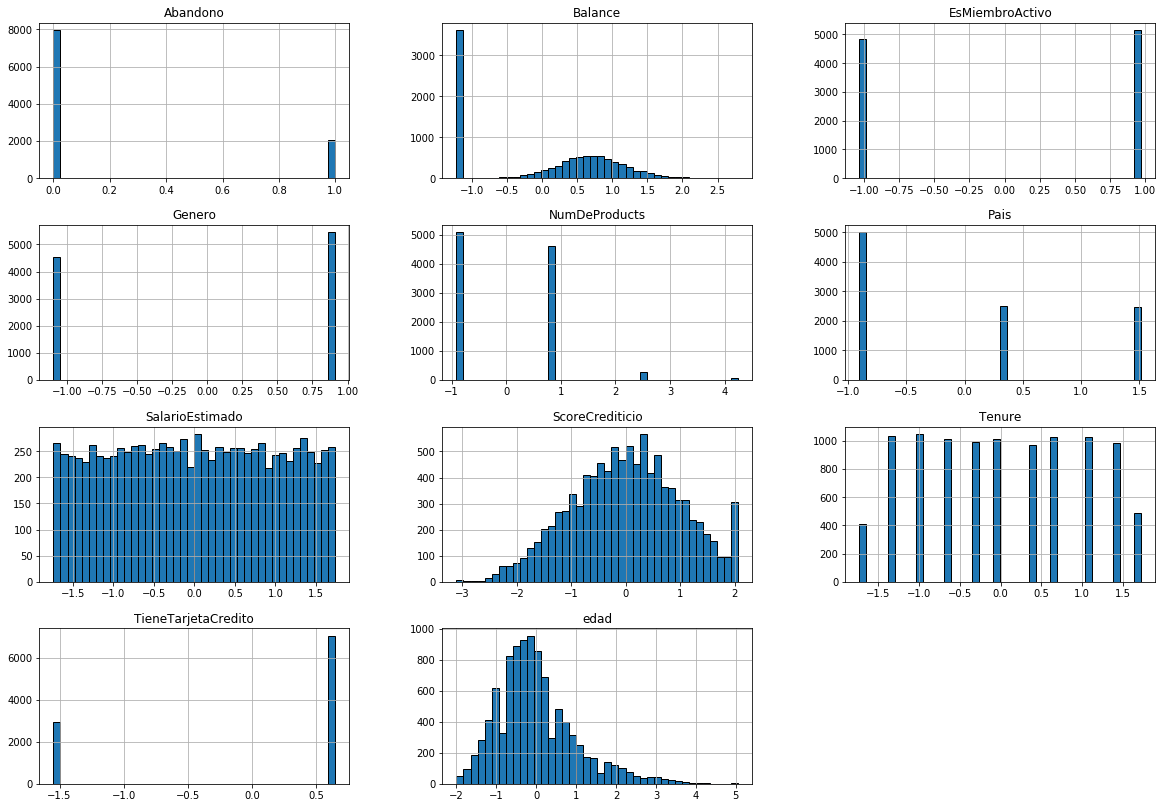


 Correlaciones:


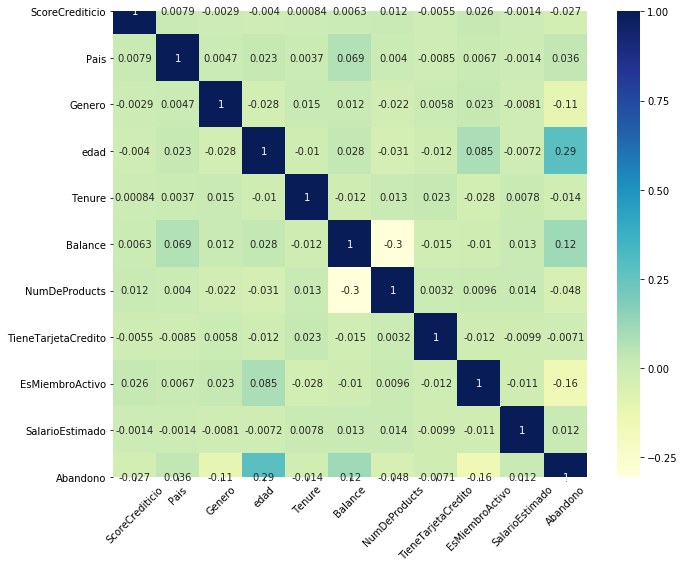

In [0]:
# Distribuciones de la data y Correlaciones
print("\n Histogramas:")
plotHistogram(dataset_final)

print("\n Correlaciones:")
plotCorrelations(dataset_final)

Dividiendo data en conjuntos de Entrenamiento y Prueba:


In [0]:
# Obteniendo valores a procesar
X = dataset_final.iloc[:, 0:10].values
y = dataset_final.iloc[:, 10].values

# Dividiendo el Dataset en sets de Training y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---
## PARTE II - CONSTRUYENDO LA RED NEURONAL ARTIFICIAL
---

In [0]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

# Inicializando la Red Neuronal
neural_network = Sequential()

# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)

# Agregado la Capa de entrada y la primera capa oculta
# 10 Neuronas en la capa de entrada y 8 Neuronas en la primera capa oculta
neural_network.add(Dense(units = 8, kernel_initializer = initial_weights, activation = 'relu', input_dim = 10))

# Agregando capa oculta
neural_network.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa oculta
neural_network.add(Dense(units = 4, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
neural_network.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))

Using TensorFlow backend.


Arquitectura de la Red Neuronal Artificial:

In [0]:
# Imprimir Arquitectura de la Red
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


Entrenamiento:

In [0]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
neural_network.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
neural_network.fit(X_train, y_train, batch_size = 32, epochs = 100)




Epoch 1/100





8000/8000 [==============================] - 7s 832us/step - loss: 0.5679 - acc: 0.7696
Epoch 2/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.4454 - acc: 0.8071
Epoch 3/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4205 - acc: 0.8233
Epoch 4/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.4033 - acc: 0.8350
Epoch 5/100
8000/8000 [==============================] - 1s 180us/step - loss: 0.3872 - acc: 0.8442
Epoch 6/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.3743 - acc: 0.8485
Epoch 7/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.3659 - acc: 0.8480
Epoch 8/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.3612 - acc: 0.8498
Epoch 9/100
8000/8000 [==============================] - 1s 162us/step - loss: 0.3585 - acc: 0.8520
Epoch 10/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.3564 - acc

---
## PARTE III - PREDICCIONES Y EVALUACIONES DE LA RED
---

In [0]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

# 50 primeros resultados a comparar
print("\nPredicciones (50 primeros):")
print("\n\tReal", "\t", "Predicción(N)","\t", "Predicción(O)")
for i in range(50):
    print(i, '\t', y_test[i], '\t ', y_pred_norm[i], '\t \t', y_pred[i])


Predicciones (50 primeros):

	Real 	 Predicción(N) 	 Predicción(O)
0 	 0 	  [0] 	 	 [0.25591797]
1 	 1 	  [0] 	 	 [0.31653506]
2 	 0 	  [0] 	 	 [0.16617256]
3 	 0 	  [0] 	 	 [0.07125753]
4 	 0 	  [0] 	 	 [0.06709316]
5 	 1 	  [1] 	 	 [0.9561175]
6 	 0 	  [0] 	 	 [0.01982319]
7 	 0 	  [0] 	 	 [0.0801284]
8 	 1 	  [0] 	 	 [0.16028535]
9 	 1 	  [1] 	 	 [0.76239324]
10 	 0 	  [0] 	 	 [0.03265542]
11 	 0 	  [0] 	 	 [0.21288738]
12 	 0 	  [0] 	 	 [0.29622465]
13 	 0 	  [0] 	 	 [0.28117135]
14 	 1 	  [1] 	 	 [0.6112473]
15 	 1 	  [0] 	 	 [0.3089583]
16 	 0 	  [0] 	 	 [0.08254933]
17 	 0 	  [0] 	 	 [0.07191664]
18 	 0 	  [0] 	 	 [0.08332911]
19 	 0 	  [0] 	 	 [0.10069495]
20 	 0 	  [1] 	 	 [0.5985567]
21 	 0 	  [0] 	 	 [0.00851977]
22 	 0 	  [0] 	 	 [0.04273018]
23 	 0 	  [0] 	 	 [0.0951266]
24 	 0 	  [0] 	 	 [0.00786319]
25 	 0 	  [0] 	 	 [0.16710573]
26 	 0 	  [0] 	 	 [0.12770015]
27 	 0 	  [0] 	 	 [0.03628084]
28 	 0 	  [0] 	 	 [0.35433203]
29 	 0 	  [0] 	 	 [0.35582292]
30 	 0 	  [0] 	 	 

Aplicando la Matriz de Confusión:

In [0]:
# Aplicando la Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_norm)
print ("\nMatriz de Confusión: \n", cm)


Matriz de Confusión: 
 [[1499   96]
 [ 196  209]]


Graficando la Matriz de Confusión:

Matriz de Confusión sin Normalizar
[[1499   96]
 [ 196  209]]


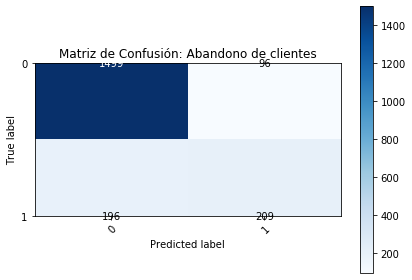

In [0]:
plot_confusion_matrix(y_test, y_pred_norm, normalize=False,title="Matriz de Confusión: Abandono de clientes")

In [0]:
# Inicializando la Red Neuronal
neural_network2 = Sequential()
# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)
neural_network2.add(Dense(units = 8, kernel_initializer = initial_weights, activation = 'relu', input_dim = 10))
neural_network2.add(Dense(units = 4, kernel_initializer = initial_weights, activation = 'relu'))
# Agregando capa de salida
neural_network2.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))
# Imprimir Arquitectura de la Red
neural_network2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
neural_network2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
neural_network2.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 208us/step - loss: 0.6309 - acc: 0.7251
Epoch 2/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.4994 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 161us/step - loss: 0.4579 - acc: 0.7962
Epoch 4/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4301 - acc: 0.8054
Epoch 5/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4111 - acc: 0.8207
Epoch 6/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.3908 - acc: 0.8379
Epoch 7/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.3766 - acc: 0.8441
Epoch 8/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.3682 - acc: 0.8490
Epoch 9/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.3637 - acc: 0.8508
Epoch 10/100
8000/8000 [==============================] - 1s 168us/step - loss: 0.3604 - acc: 0.8521

Matriz de Confusión sin Normalizar
[[1520   75]
 [ 206  199]]


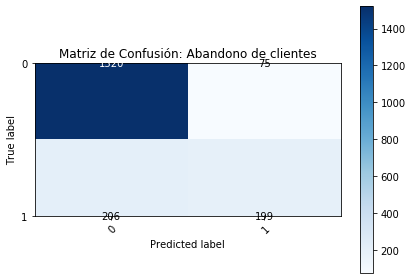

In [0]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network2.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

plot_confusion_matrix(y_test, y_pred_norm, normalize=False,title="Matriz de Confusión: Abandono de clientes")

In [0]:
# Inicializando la Red Neuronal
neural_network3 = Sequential()
# kernel_initializer Define la forma como se asignará los Pesos iniciales Wi
initial_weights = RandomUniform(minval = -0.5, maxval = 0.5)
neural_network3.add(Dense(units = 9, kernel_initializer = initial_weights, activation = 'relu', input_dim = 10))
neural_network3.add(Dense(units = 7, kernel_initializer = initial_weights, activation = 'relu'))
neural_network3.add(Dense(units = 5, kernel_initializer = initial_weights, activation = 'relu'))

# Agregando capa de salida
neural_network3.add(Dense(units = 1, kernel_initializer = initial_weights, activation = 'sigmoid'))
# Imprimir Arquitectura de la Red
neural_network3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 9)                 99        
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compilando la Red Neuronal
# optimizer: Algoritmo de optimización | binary_crossentropy = 2 Classes
# loss: error
neural_network3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Entrenamiento
neural_network3.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 2s 216us/step - loss: 0.5574 - acc: 0.7860
Epoch 2/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.4544 - acc: 0.7969
Epoch 3/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.4302 - acc: 0.8099
Epoch 4/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.4141 - acc: 0.8233
Epoch 5/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.3949 - acc: 0.8340
Epoch 6/100
8000/8000 [==============================] - 1s 183us/step - loss: 0.3783 - acc: 0.8467
Epoch 7/100
8000/8000 [==============================] - 1s 187us/step - loss: 0.3683 - acc: 0.8530
Epoch 8/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.3644 - acc: 0.8540
Epoch 9/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.3611 - acc: 0.8561
Epoch 10/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.3602 - acc: 0.8553

Matriz de Confusión sin Normalizar
[[1526   69]
 [ 214  191]]


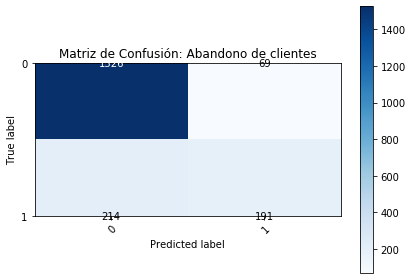

In [0]:
# Haciendo predicción de los resultados del Test
y_pred = neural_network3.predict(X_test)
y_pred_norm = (y_pred > 0.5)

y_pred_norm = y_pred_norm.astype(int)
y_test = y_test.astype(int)

plot_confusion_matrix(y_test, y_pred_norm, normalize=False,title="Matriz de Confusión: Abandono de clientes")